# Match Results Multi-Regression Model with FLAML

This notebook implements a multi-regression model to predict `FTHome` and `FTAway` scores using the FLAML AutoML library.

In [1]:
!pip install pandas numpy matplotlib seaborn flaml scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
df = pd.read_csv('./matches-prepared.csv')
print(f"Dataset shape: {df.shape}")
display(df.head(40))

Dataset shape: (230554, 40)


,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,...,OddAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB,match_result,total_goals,over25_binary
0,F1,2000-07-28,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,...,4.30,NaN,NaN,NaN,NaN,NaN,NaN,Win,4.0,1
1,F1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,...,4.60,NaN,NaN,NaN,NaN,NaN,NaN,Win,4.0,1
2,F2,2000-07-28,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loss,1.0,0
3,F1,2000-07-29,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,0.0,...,3.90,NaN,NaN,NaN,NaN,NaN,NaN,Loss,1.0,0
4,F1,2000-07-29,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,0.0,...,4.30,NaN,NaN,NaN,NaN,NaN,NaN,Draw,2.0,0
5,F1,2000-07-29,Guingamp,St Etienne,1578.51,1620.74,0.0,0.0,0.0,0.0,...,2.75,NaN,NaN,NaN,NaN,NaN,NaN,Draw,4.0,1
6,F1,2000-07-29,Lille,Monaco,1630.81,1778.03,0.0,0.0,0.0,0.0,...,2.25,NaN,NaN,NaN,NaN,NaN,NaN,Draw,2.0,0
7,F1,2000-07-29,Lyon,Rennes,1702.60,1644.99,0.0,0.0,0.0,0.0,...,4.60,NaN,NaN,NaN,NaN,NaN,NaN,Draw,4.0,1
8,F1,2000-07-29,Nantes,Lens,1664.36,1730.89,0.0,0.0,0.0,0.0,...,3.00,NaN,NaN,NaN,NaN,NaN,NaN,Loss,2.0,0
9,F1,2000-07-29,Toulouse,Bastia,1551.65,1656.37,0.0,0.0,0.0,0.0,...,3.50,NaN,NaN,NaN,NaN,NaN,NaN,Loss,1.0,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Preprocessing

Selecting features and splitting the data.

In [4]:
# Define features (X) and target variables (y)
# Excluding columns that are not features or could cause data leakage
drop_cols = ['Division', 'MatchDate', 'FTHome', 'FTAway', 'TotalGoals', 'high_score', 'total_goals', 'over25_binary', 'FTResult', 'HTResult', 'match_result']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y_home = df['FTHome']
y_away = df['FTAway']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Split data into training and testing sets
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test = train_test_split(
    X, y_home, y_away, test_size=0.2, random_state=42
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Numerical features: 29
Categorical features: 2
Train set size: 184443
Test set size: 46111


## AutoML Training with FLAML

Training two separate models for `FTHome` and `FTAway`.

In [6]:
automl_home = AutoML()
settings = {
    "time_budget": 300,
    "metric": 'mae',
    "task": 'regression',
    "ensemble": False,
    "log_file_name": 'flaml_home.log',
}

print("Training AutoML for FTHome...")
automl_home.fit(X_train=X_train, y_train=y_home_train, **settings)

Training AutoML for FTHome...
[flaml.automl.logger: 01-05 17:47:39] {1752} INFO - task = regression
[flaml.automl.logger: 01-05 17:47:39] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 01-05 17:47:39] {1862} INFO - Minimizing error metric: mae
[flaml.automl.logger: 01-05 17:47:39] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 01-05 17:47:39] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-05 17:47:39] {2417} INFO - Estimated sufficient time budget=26679s. Estimated necessary time budget=191s.
[flaml.automl.logger: 01-05 17:47:39] {2466} INFO -  at 2.8s,	estimator lgbm's best error=0.9114,	best estimator lgbm's best error=0.9114
[flaml.automl.logger: 01-05 17:47:39] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-05 17:47:39] {2466} INFO -  at 2.9s,	estimator lgbm's best error=0.9114,	best estimator lgbm's best error=0.9114
[flaml.au

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-05 17:47:40] {2466} INFO -  at 3.5s,	estimator sgd's best error=0.9794,	best estimator lgbm's best error=0.8220
[flaml.automl.logger: 01-05 17:47:40] {2282} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 01-05 17:47:40] {2466} INFO -  at 3.8s,	estimator lgbm's best error=0.7790,	best estimator lgbm's best error=0.7790
[flaml.automl.logger: 01-05 17:47:40] {2282} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 01-05 17:47:41] {2466} INFO -  at 4.0s,	estimator lgbm's best error=0.7790,	best estimator lgbm's best error=0.7790
[flaml.automl.logger: 01-05 17:47:41] {2282} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 01-05 17:47:41] {2466} INFO -  at 4.3s,	estimator lgbm's best error=0.7790,	best estimator lgbm's best error=0.7790
[flaml.automl.logger: 01-05 17:47:41] {2282} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 01-05 17:47:42] {2466} INFO -  at 5.0s,	estimator lgbm's best error=0.7790,	best es

In [7]:
automl_away = AutoML()
settings = {
    "time_budget": 300,
    "metric": 'mae',
    "task": 'regression',
    "ensemble": False,
    "log_file_name": 'flaml_away.log',
}

print("Training AutoML for FTAway...")
automl_away.fit(X_train=X_train, y_train=y_away_train, **settings)

Training AutoML for FTAway...
[flaml.automl.logger: 01-05 17:53:05] {1752} INFO - task = regression
[flaml.automl.logger: 01-05 17:53:05] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 01-05 17:53:05] {1862} INFO - Minimizing error metric: mae
[flaml.automl.logger: 01-05 17:53:05] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 01-05 17:53:05] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-05 17:53:05] {2417} INFO - Estimated sufficient time budget=9560s. Estimated necessary time budget=68s.
[flaml.automl.logger: 01-05 17:53:05] {2466} INFO -  at 1.1s,	estimator lgbm's best error=0.7666,	best estimator lgbm's best error=0.7666
[flaml.automl.logger: 01-05 17:53:05] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-05 17:53:05] {2466} INFO -  at 1.2s,	estimator lgbm's best error=0.7666,	best estimator lgbm's best error=0.7666
[flaml.auto

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-05 17:53:05] {2466} INFO -  at 1.2s,	estimator sgd's best error=0.8291,	best estimator lgbm's best error=0.7666
[flaml.automl.logger: 01-05 17:53:05] {2282} INFO - iteration 3, current learner sgd
[flaml.automl.logger: 01-05 17:53:05] {2466} INFO -  at 1.3s,	estimator sgd's best error=0.8092,	best estimator lgbm's best error=0.7666
[flaml.automl.logger: 01-05 17:53:05] {2282} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 01-05 17:53:06] {2466} INFO -  at 1.4s,	estimator lgbm's best error=0.7131,	best estimator lgbm's best error=0.7131
[flaml.automl.logger: 01-05 17:53:06] {2282} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 01-05 17:53:06] {2466} INFO -  at 1.5s,	estimator xgboost's best error=0.7666,	best estimator lgbm's best error=0.7131
[flaml.automl.logger: 01-05 17:53:06] {2282} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 01-05 17:53:06] {2466} INFO -  at 1.5s,	estimator lgbm's best error=0.6898,	bes

## Evaluation

Analyzing the results and metrics.

In [14]:
def evaluate_regression(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\nMetrics for {label}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    return mae, rmse, r2

y_home_pred = automl_home.predict(X_test)
y_away_pred = automl_away.predict(X_test)

evaluate_regression(y_home_test, y_home_pred, "FTHome")
evaluate_regression(y_away_test, y_away_pred, "FTAway")


Metrics for FTHome:
MAE: 0.7325
RMSE: 0.9372
R2 Score: 0.4424

Metrics for FTAway:
MAE: 0.6583
RMSE: 0.8393
R2 Score: 0.4284


(0.6583204001893636, np.float64(0.8392940992285121), 0.4284446016280208)

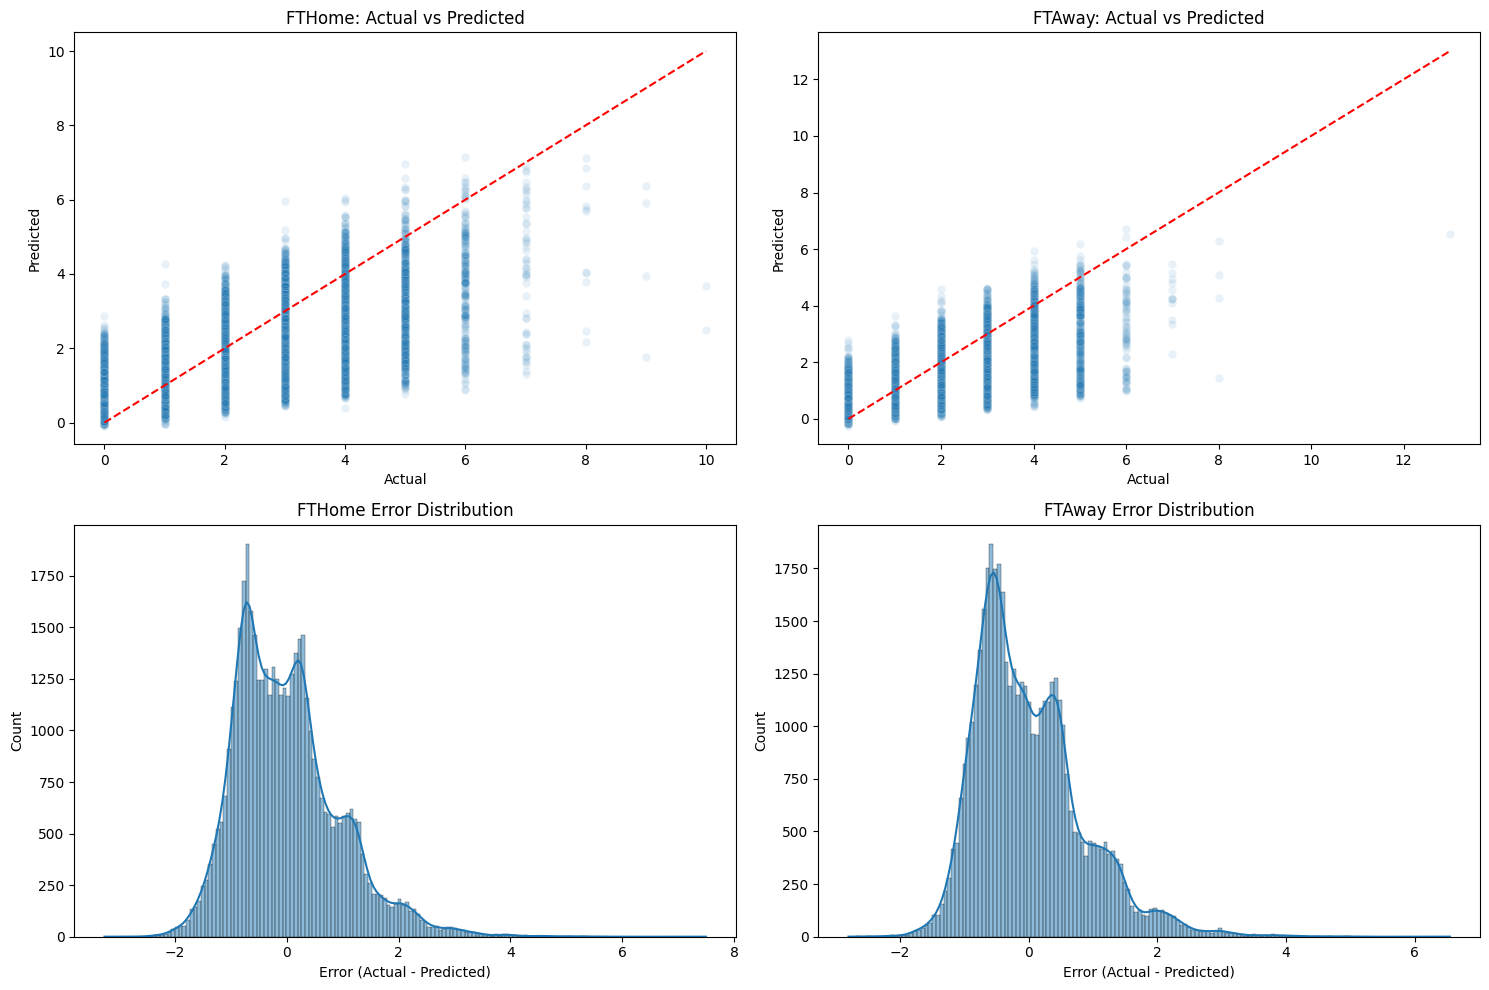

In [9]:
plt.figure(figsize=(15, 10))

# Actual vs Predicted
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_home_test, y=y_home_pred, alpha=0.1)
plt.plot([0, y_home_test.max()], [0, y_home_test.max()], '--r')
plt.title('FTHome: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_away_test, y=y_away_pred, alpha=0.1)
plt.plot([0, y_away_test.max()], [0, y_away_test.max()], '--r')
plt.title('FTAway: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Error Distributions
plt.subplot(2, 2, 3)
sns.histplot(y_home_test - y_home_pred, kde=True)
plt.title('FTHome Error Distribution')
plt.xlabel('Error (Actual - Predicted)')

plt.subplot(2, 2, 4)
sns.histplot(y_away_test - y_away_pred, kde=True)
plt.title('FTAway Error Distribution')
plt.xlabel('Error (Actual - Predicted)')

plt.tight_layout()
plt.show()

In [10]:
print("\nBest model for FTHome:", automl_home.best_estimator)
print("Best model for FTAway:", automl_away.best_estimator)


Best model for FTHome: xgboost
Best model for FTAway: xgb_limitdepth


In [33]:
def match_result(home, away):
    if home > away:
        return "H"   # Home win
    elif home < away:
        return "A"   # Away win
    else:
        return "D"   # Draw

def show_predictions(num_samples=10):
    indices = np.random.choice(X_test.index, num_samples, replace=False)
    samples = X_test.loc[indices]

    actual_home = y_home_test.loc[indices]
    actual_away = y_away_test.loc[indices]

    pred_home = automl_home.predict(samples)
    pred_away = automl_away.predict(samples)

    pred_home = np.round(pred_home).astype(int)
    pred_away = np.round(pred_away).astype(int)

    results = []

    for i in range(len(samples)):
        ah, aa = actual_home.iloc[i], actual_away.iloc[i]
        ph, pa = pred_home[i], pred_away[i]

        full_correct = (ah == ph) and (aa == pa)
        home_correct = (ah == ph)
        away_correct = (aa == pa)

        actual_result = match_result(ah, aa)
        pred_result = match_result(ph, pa)
        result_correct = (actual_result == pred_result)

        results.append({
            "Home Team": samples.iloc[i]["HomeTeam"],
            "Away Team": samples.iloc[i]["AwayTeam"],
            "Actual": f"{ah}-{aa}",
            "Predicted": f"{ph}-{pa}",
            "Full Correct": full_correct,
            "Home Goal Correct": home_correct,
            "Away Goal Correct": away_correct,
            "Result Correct (W/D/L)": result_correct
        })

    df = pd.DataFrame(results)
    display(df)

show_predictions()

,Home Team,Away Team,Actual,Predicted,Full Correct,Home Goal Correct,Away Goal Correct,Result Correct (W/D/L)
0,Walsall,Oldham,0.0-2.0,1-1,False,False,False,False
1,Marseille,Guingamp,2.0-0.0,2-0,True,True,True,True
2,Levante,Mallorca,0.0-0.0,1-1,False,False,False,True
3,Ath Madrid,Celta,3.0-2.0,3-2,True,True,True,True
4,Gretna,East Stirling,8.0-1.0,6-2,False,False,False,True
5,Porto,Gil Vicente,4.0-1.0,3-1,False,False,True,True
6,Eibar,Valladolid,0.0-2.0,0-1,False,True,False,True
7,Oud-Heverlee Leuven,Oostende,1.0-2.0,2-1,False,False,False,False
8,Stabaek,Stromsgodset,0.0-2.0,2-2,False,False,True,False
9,East Stirling,Cowdenbeath,2.0-1.0,1-2,False,False,False,False
